<center><h1>HR_Dataset to uncover insights about possible employee attrition.</h1></center>

Problem Statement:
Refer HR_Dataset to uncover insights about possible employee attrition.
Selective attribute information:
Education:
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'
Environment Satisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
Job Involvement:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
Job Satisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
Performance Rating:
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'
Relationship Satisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'
Work Life Balance:
1 'Bad'
2 'Good'
3 'Better'
4 'Best'
Please answer the following questions along the way:
1. Build appropriate ML models.
2. Choose the best model and mention the reasons behind doing so.
3. Summarize the key conclusions and make suggestions to the organization.

In [1]:
hr = pd.read_csv("HR_DATASET.csv")

<IPython.core.display.Javascript object>

In [2]:
def explore(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [3]:
explore(hr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

data type  percent missing  No. unique  \
Age                          int64              0.0          43   
YearsInCurrentRole           int64              0.0          18   
YearsAtCompany               int64              0.0          34   
WorkLifeBalance              int64              0.0           4   
TrainingTimesLastYear        int64              0.0           7   
TotalWorkingYears            int64              0.0          39   
StockOptionLevel             int64              0.0           4   
StandardHours                int64              0.0           1   
RelationshipSatisfaction     int64              0.0           4   
PerformanceRating            int64              0.0           2   
PercentSalaryHike            int64              0.0          15   
NumCompaniesWorked           int64              0.0          10   
MonthlyRate                  int64              0.0         899   
MonthlyIncome                int64              0.0         865   
YearsSinceLastPromotion      int64              0.0          16   
JobSatisfaction              int64              0.0           4   
YearsWithCurrManager         int64              0.0          18   
JobLevel                     int64              0.0           5   
DailyRate                    int64              0.0         673   
DistanceFromHome             int64              0.0          29   
Education                    int64              0.0           5   
EmployeeNumber               int64              0.0         917   
EnvironmentSatisfaction      int64              0.0           4   
EmployeeCount                int64              0.0           1   
HourlyRate                   int64              0.0          71   
JobInvolvement               int64              0.0           4   
Over18                      object              0.0           1   
JobRole                     object              0.0           9   
EducationField              object              0.0           6   
Gender                      object              0.0           2   
Department                  object              0.0           3   
BusinessTravel              object              0.0           3   
Attrition                   object              0.0           2   
OverTime                    object              0.0           2   
MaritalStatus               object              0.0           3   

                                                              unique values  
Age                       [41, 49, 37, 33, 27, 32, 38, 34, 52, 25, 45, 2...  
YearsInCurrentRole        [4, 7, 0, 2, 8, 6, 9, 5, 3, 14, 15, 13, 1, 10,...  
YearsAtCompany            [6, 10, 0, 8, 2, 1, 34, 5, 4, 15, 3, 24, 13, 2...  
WorkLifeBalance                                                [1, 3, 4, 2]  
TrainingTimesLastYear                                 [0, 3, 2, 5, 1, 4, 6]  
TotalWorkingYears         [8, 10, 7, 6, 34, 9, 2, 24, 5, 11, 17, 3, 1, 3...  
StockOptionLevel                                               [0, 1, 2, 3]  
StandardHours                                                          [80]  
RelationshipSatisfaction                                       [1, 4, 2, 3]  
PerformanceRating                                                    [3, 4]  
PercentSalaryHike         [11, 23, 15, 12, 13, 14, 18, 22, 17, 16, 19, 2...  
NumCompaniesWorked                           [8, 1, 6, 9, 3, 0, 4, 5, 2, 7]  
MonthlyRate               [19479, 24907, 2396, 23159, 16632, 21146, 2047...  
MonthlyIncome             [5993, 5130, 2090, 2909, 3468, 5309, 3057, 512...  
YearsSinceLastPromotion   [0, 1, 3, 2, 4, 7, 14, 13, 6, 5, 8, 11, 15, 10...  
JobSatisfaction                                                [4, 2, 3, 1]  
YearsWithCurrManager      [5, 7, 0, 2, 1, 16, 8, 4, 3, 9, 12, 6, 17, 11,...  
JobLevel                                                    [2, 1, 4, 5, 3]  
DailyRate                 [1102, 279, 1373, 1392, 591, 430, 268, 167, 62...  
DistanceFromHome          [1, 8, 2, 3, 24, 26, 10, 2

In [4]:
hr.shape

(917, 35)

In [45]:
# Checking for duplicates
hr.duplicated().sum()

0

<Axes: >

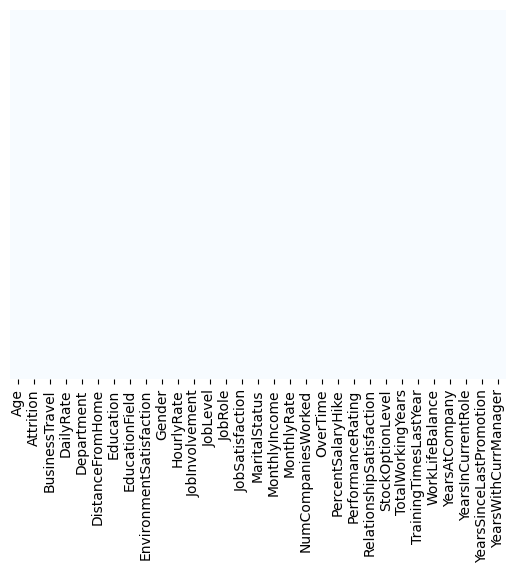

In [46]:
# Checking for missing data
sns.heatmap(hr.isnull(), yticklabels = False, cbar = False,cmap='Blues')

Comment: The dataset has no duplicates or missing values that would need to be handled before modelling.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>],
       [<Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>,
        <Axes: title={'center': 'YearsAtCompany'}>,


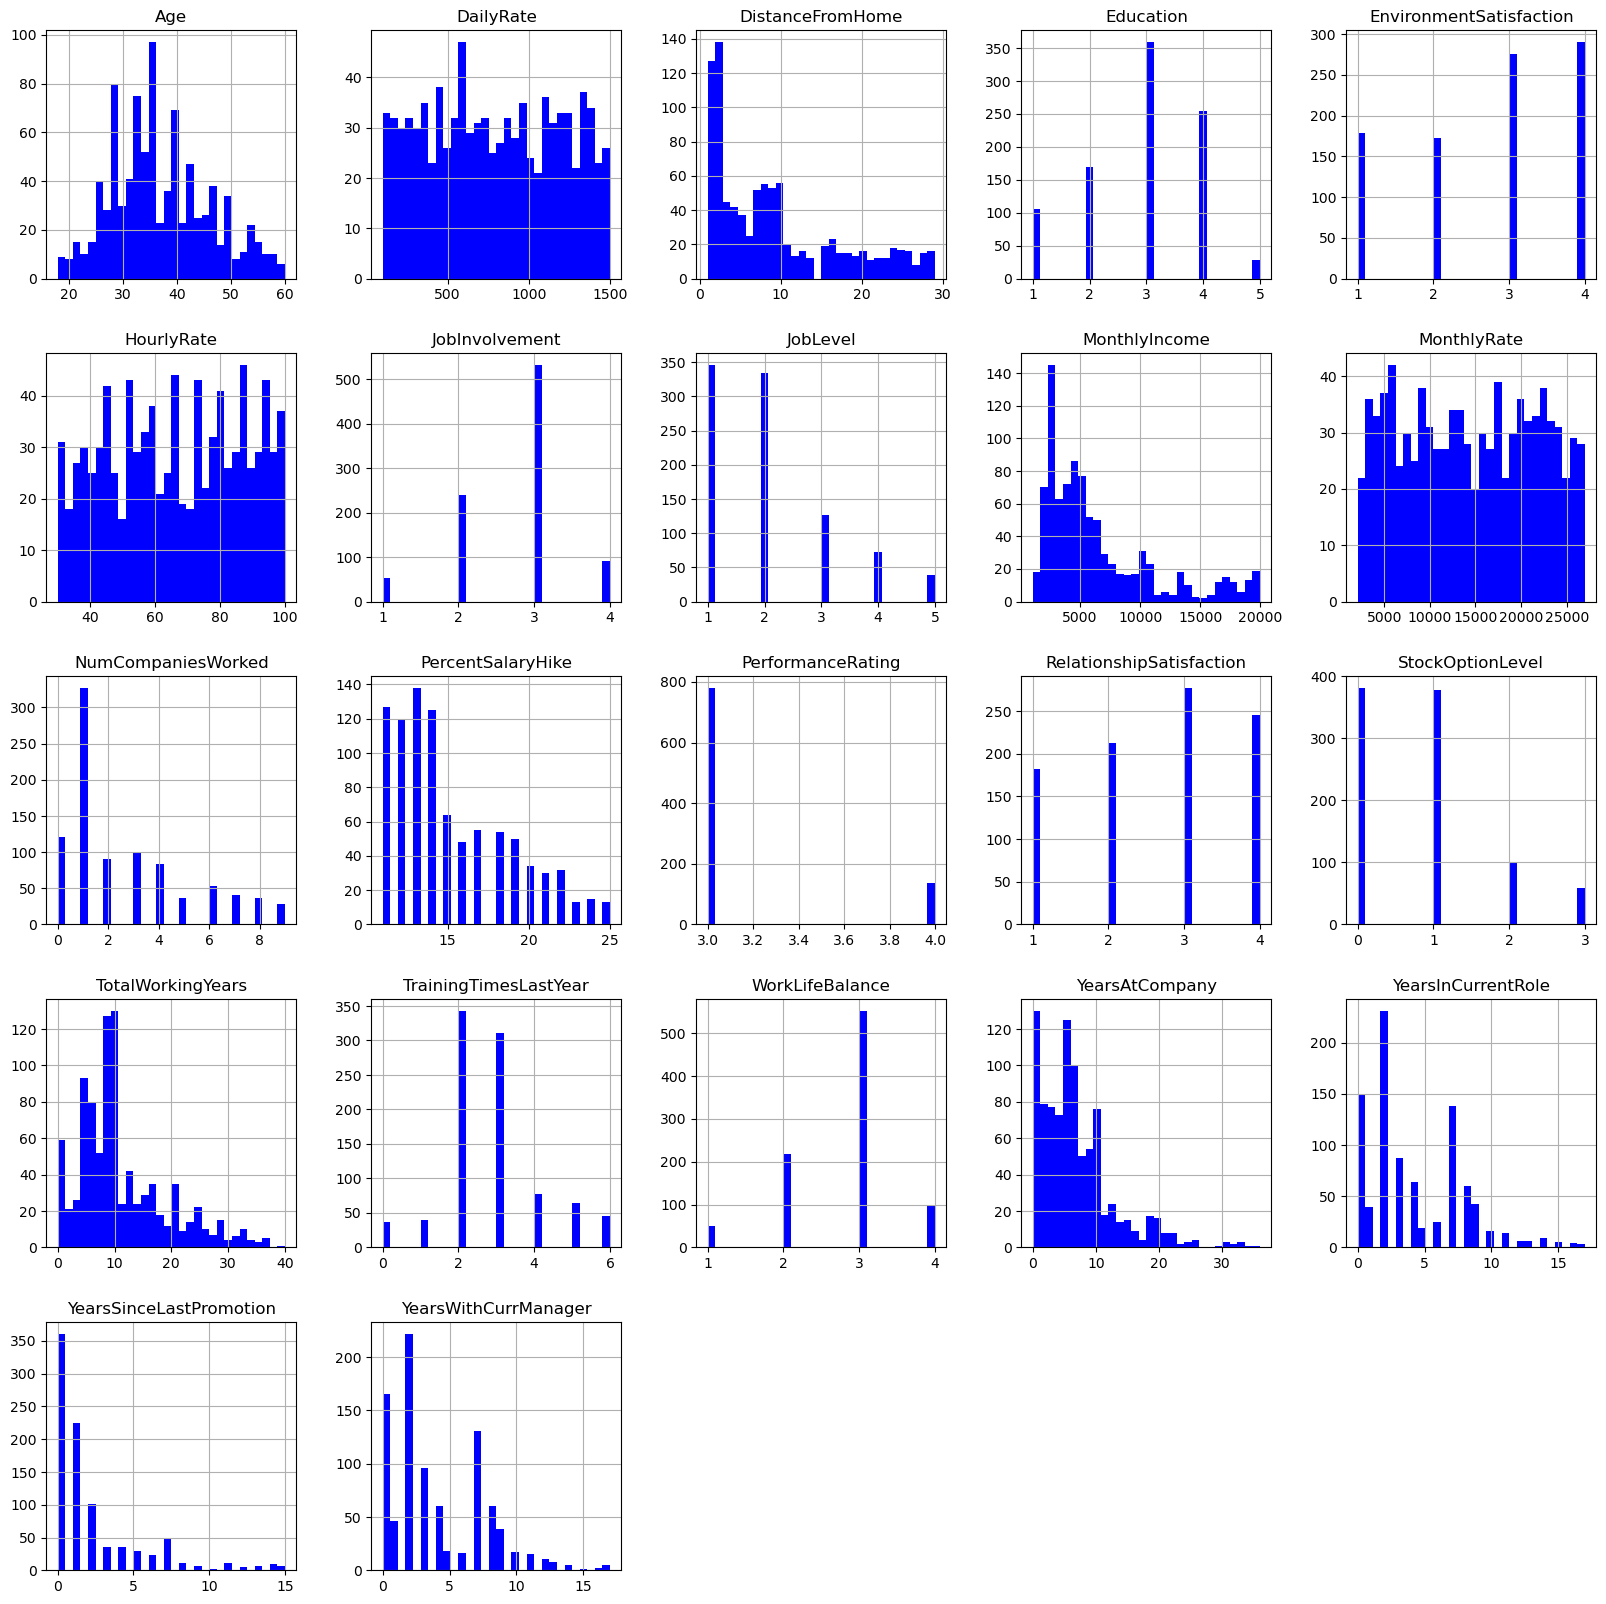

In [48]:
# Explring the informativeness of the individual features 
hr.hist(bins=30, figsize=(20,20), color='b')

Comment: Features 'EmployeeCount', 'Standardhours', 'EmployeeNumber', and 'Over18' are not informative, as they are either constant or unique values, thus cannot provide insights into the differences between the employees who leave or stay in the company.

In [5]:
#uncessary columns
hr = hr.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

<b> <h4>In this article, we'll look into an important topic: handling imbalanced datasets. The data shows that 16.8% of employees stayed with the organization, while 83.2% left. Recognizing this imbalance is essential for deciding on the best approach to building our predictive model.</h4></b>

<IPython.core.display.Javascript object>

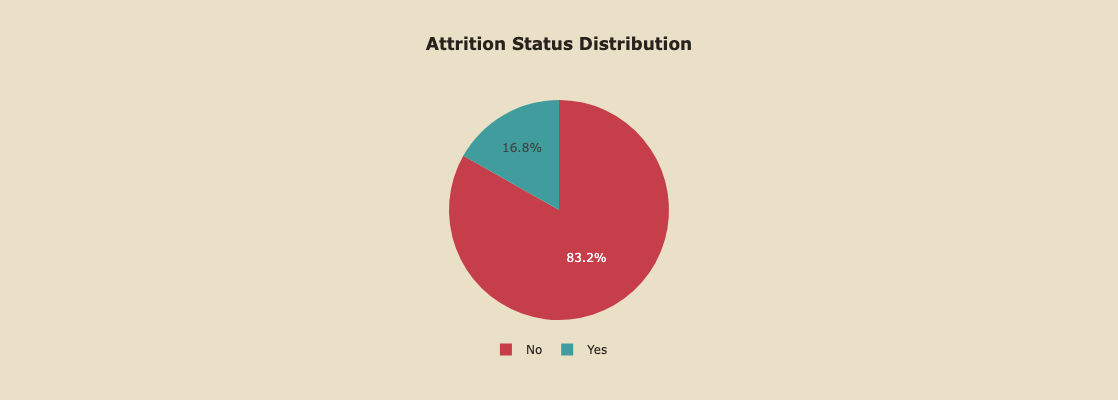

In [6]:
attrition_distribution = hr['Attrition'].value_counts(normalize=True) * 100

# Create a pie chart
fig = px.pie(values=attrition_distribution, names=attrition_distribution.index, 
             title='<b>Attrition Status Distribution</b>', 
             labels={'names': 'Attrition Status', 'values': 'Percentage'}, height=400,
             color_discrete_sequence=['#C53E4A', '#419D9D'])  # Specify colors directly here

fig.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.3, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7',
                  plot_bgcolor='#EADFC7')

fig.update_layout(title_x=0.5, legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49))

fig.show()

<center> <h2>Gender Disparity in Attrition Rates</h2> </center>

<IPython.core.display.Javascript object>

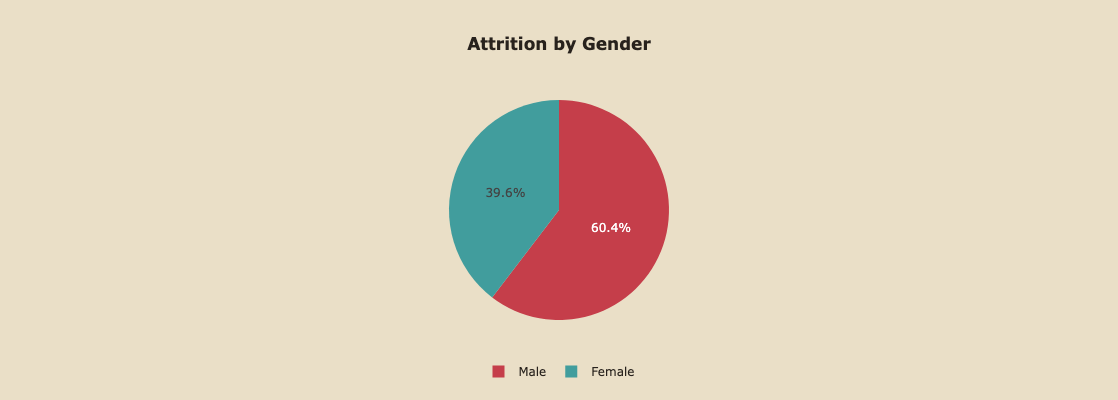

In [7]:
attrition_yes = hr[hr['Attrition'] == 'Yes']
attrition_gender_counts = attrition_yes['Gender'].value_counts()

fig = px.pie(values=attrition_gender_counts, names=attrition_gender_counts.index, 
             title='<b>Attrition by Gender</b>',
             labels={'names': 'Gender', 'values': 'Count'}, height=400,                     
             color_discrete_sequence=['#C53E4A', '#419D9D'])  # Specify colors directly here

fig.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.3, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7',
                  plot_bgcolor='#EADFC7')

fig.show()


The data indicates that the attrition rate is 39.6% for females and 60.4% for males. This suggests a higher attrition rate among males compared to females, potentially influenced by various factors such as job satisfaction, career opportunities, and workplace environment.

<center> <h2>What is the relationship between attrition and age?</h2></center> 

<IPython.core.display.Javascript object>

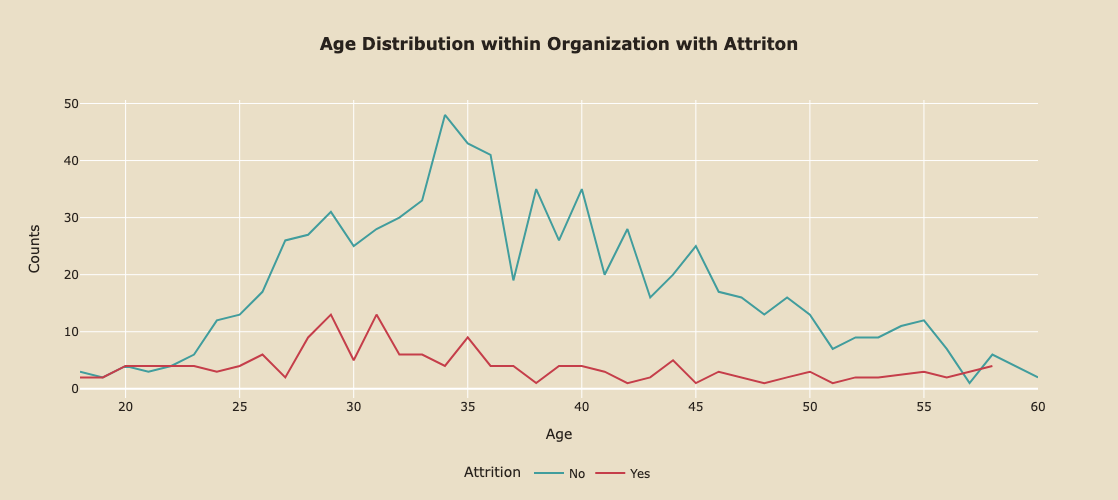

In [8]:
# Grouping by age and attrition status, counting daily rates, and resetting index

age_att = hr.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')

line_chart = px.line(age_att, x='Age', y='Counts', color='Attrition',
                     title='<b>Age Distribution within Organization with Attriton</b>', height=500,
                     color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify line colors here

line_chart.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='top center',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_chart.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.3, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7',
                  plot_bgcolor='#EADFC7')


line_chart.show()


The age group between 28-35 witnesses the highest attrition rate, indicating a critical phase where individuals may reassess their career paths. This trend gradually declines with advancing age, reflecting a growing emphasis on job stability and long-term commitments. 
<br>
Conversely, the early career stages, notably between 18-20, often see heightened attrition as individuals explore different opportunities. This pattern reaches a turning point around the age of 21, marking a transition towards more stable employment decisions.

<center><h2>Exploring the Influence of Income on Employee Attrition Rates</h2></center>

<IPython.core.display.Javascript object>

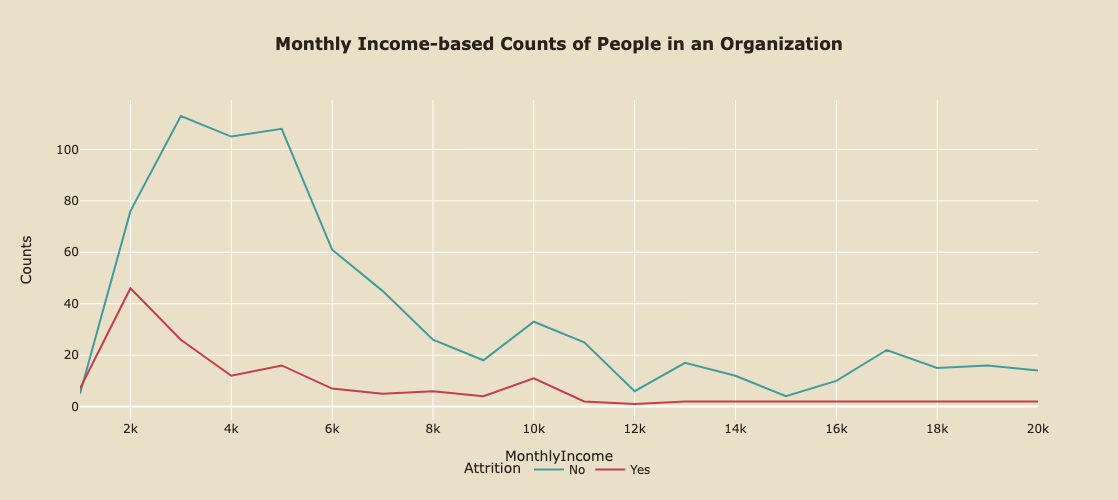

In [9]:
# Grouping by monthly income and attrition status, counting occurrences, and resetting index
rate_att = hr.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Rounding monthly income to the nearest thousand
rate_att['MonthlyIncome'] = round(rate_att['MonthlyIncome'], -3)

# Grouping again by rounded monthly income and attrition status, counting occurrences, and resetting index
rate_att = rate_att.groupby(['MonthlyIncome', 'Attrition']).size().reset_index(name='Counts')

# Creating the line chart
line_chart = px.line(rate_att, x='MonthlyIncome', y='Counts', color='Attrition',
                     title='<b>Monthly Income-based Counts of People in an Organization</b>', height=500,
                     color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify line colors here

line_chart.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='top center',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_chart.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')
line_chart.show()


Examining the above chart reveals a significant increase in attrition rates at very low income levels, specifically below 5000 per month. This trend gradually decreases, with a slight increase observed around the 10000 mark, indicative of the middle-class livelihood.
<br>
Individuals in this income bracket often aspire to enhance their standards of living, leading them to seek new job opportunities. Conversely, as monthly income reaches a more comfortable level, the likelihood of employee turnover diminishes, as evidenced by the stable, flat line.

<center> <h2>Impact of Job Satisfaction on Employee Attrition with Average Monthly Salary</h2> </center>

<IPython.core.display.Javascript object>

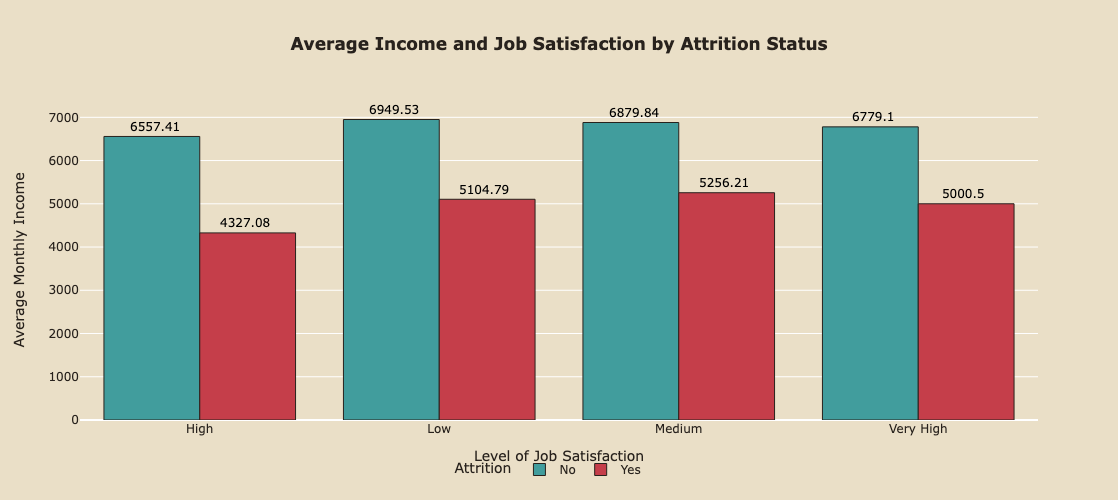

In [10]:
# Map job satisfaction level to corresponding text labels
job_satisfaction_labels = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

# Convert 'JobSatisfaction' column to text labels
hr['JobSatisfaction'] = hr['JobSatisfaction'].map(job_satisfaction_labels)

# Group data by 'JobSatisfaction' and 'Attrition', calculate average monthly income
avg_inc = hr.groupby(['JobSatisfaction', 'Attrition'])['MonthlyIncome'].mean().reset_index()

# Create Plotly plot
fig = px.bar(avg_inc, x='JobSatisfaction', y='MonthlyIncome', color='Attrition', barmode='group',
             title='<b>Average Income and Job Satisfaction by Attrition Status</b>',
             labels={'JobSatisfaction': 'Level of Job Satisfaction', 'MonthlyIncome': 'Average Monthly Income'},
             category_orders={'JobSatisfaction': sorted(hr['JobSatisfaction'].unique())}, height=500,
            color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify custom colors

# Add data labels with adjusted positions
for trace in fig.data:
    if trace.name == 'Yes':
        for i, label in enumerate(trace.y):
            fig.add_annotation(x=trace.x[i], y=label, text=str(round(label, 2)),
                               showarrow=False, font=dict(color='black', size=12), yshift=10, xshift=45)
    else:
        for i, label in enumerate(trace.y):
            fig.add_annotation(x=trace.x[i], y=label, text=str(round(label, 2)),
                               showarrow=False, font=dict(color='black', size=12), yshift=10, xshift=-45)

# Add percentage labels to the bars
fig.update_traces(textposition='outside',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

fig.show()


In analyzing attrition trends, it's evident that individuals with lower levels of job satisfaction are more inclined to leave their positions. This trend is particularly noticeable among those earning an average monthly salary of 4327.08, indicating that dissatisfaction may drive employee turnover.

Conversely, individuals with higher satisfaction levels, especially those earning an average monthly salary of 6557.41, are more likely to remain with the company. This suggests that job satisfaction plays a crucial role in employee retention, with higher satisfaction levels mitigating the risk of attrition.

Overall, this insight underscores the importance of fostering a positive work environment and addressing factors contributing to job dissatisfaction to reduce attrition rates and retain valuable talent within the organization.

<center> <h2>Analysis of Attrition Rates Across Departments</h2> </center>

<IPython.core.display.Javascript object>

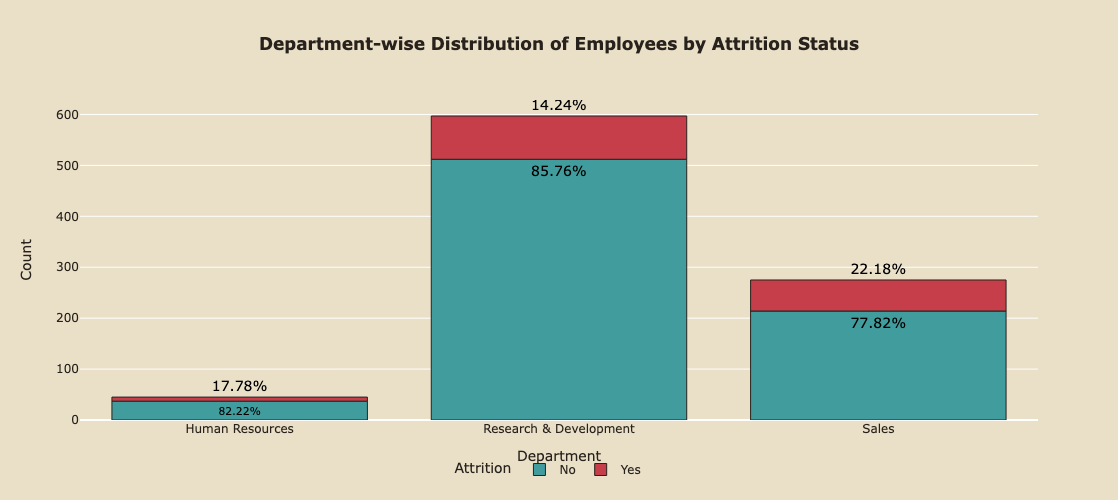

In [11]:
# Group data by Department and Attrition, count occurrences, and reset index
dept_att = hr.groupby(['Department', 'Attrition']).size().reset_index(name='Counts')

# Calculate total counts per department
dept_total_counts = dept_att.groupby('Department')['Counts'].transform('sum')

# Calculate percentage within each department
dept_att['Percentage'] = (dept_att['Counts'] / dept_total_counts) * 100

# Create a bar plot
fig = px.bar(dept_att, x='Department', y='Counts', color='Attrition',
             title='<b>Department-wise Distribution of Employees by Attrition Status</b>',
             text='Percentage', # Use 'Percentage' column as text
             labels={'Counts': 'Count', 'Percentage': 'Percentage'}, height = 500, 
            color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify custom colors

# Add percentage labels to the bars
fig.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='outside',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

fig.show()


This dataset includes three primary departments. Among them, the Sales department exhibits the highest attrition rate at 22.18%, trailed by the Human Resources Department at 17.78%. Conversely, the Research and Development department demonstrates the lowest attrition rate, indicating stability and contentment within the department, as depicted in the chart (14.24%).

<center> <h2>Attrition Rates Across Job Roles: A Hierarchy of Stability</h2> </center>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

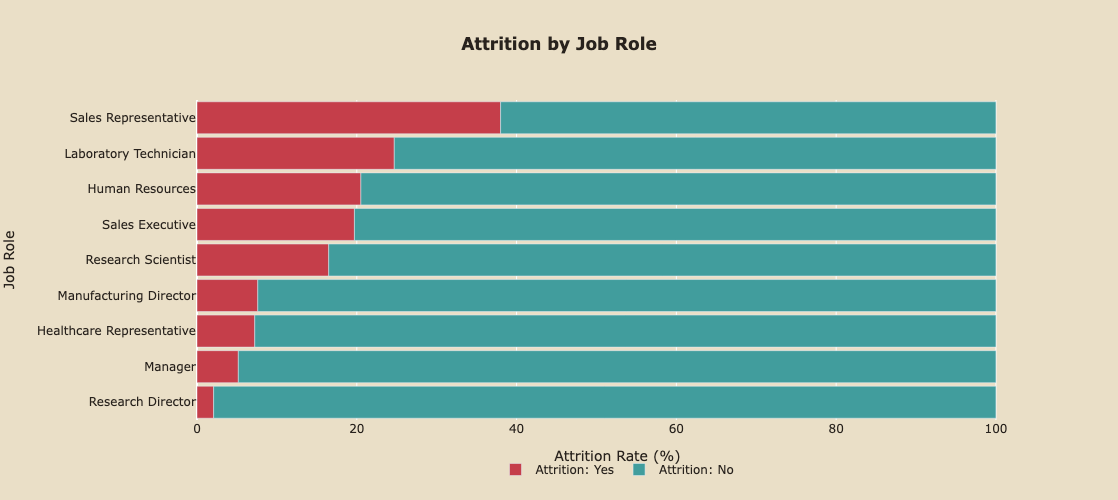

In [12]:
# Group data by JobRole and Attrition, calculate count and percentage
attr_job = hr.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
attr_job['Total'] = attr_job.sum(axis=1)
attr_job['Attrition_Rate'] = attr_job['Yes'] / attr_job['Total'] * 100

attr_job = attr_job.sort_values('Attrition_Rate')

fig = go.Figure()

# Add 'Yes' Attrition bars
fig.add_trace(go.Bar(y=attr_job.index,
                     x=attr_job['Attrition_Rate'],
                     name='Attrition: Yes',
                     orientation='h',
                     marker_color='#C53E4A'))

# Add 'No' Attrition bars
fig.add_trace(go.Bar(y=attr_job.index,
                     x=100 - attr_job['Attrition_Rate'],
                     name='Attrition: No',
                     orientation='h',
                     marker_color='#419D9D'))

fig.update_layout(
    title='<b>Attrition by Job Role</b>',
    title_x=0.5,
    xaxis_title='Attrition Rate (%)',
    yaxis_title='Job Role',
    barmode='relative',
    bargap=0.1,
    legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center',  x=0.50),
    height=500,
    font_color='#28221D', 
    paper_bgcolor='#EADFC7',
    plot_bgcolor='#EADFC7'
)

fig.show()

The analysis suggests that higher-level job roles within the organization demonstrate lower attrition rates compared to lower-level roles. Positions such as manufacturing directors, healthcare representatives, managers, and research directors exhibit notably lower attrition rates, indicating that individuals in these roles are less likely to leave the company. 

Conversely, roles at lower organizational levels, such as sales representatives, laboratory technicians, and human resources personnel, demonstrate higher attrition rates. This insight implies that individuals in higher-level job roles tend to stay with the company more consistently, contributing to a more stable workforce

<center> <h2>The Impact of Salary Hikes on Employee Retention</h2> </center>

<IPython.core.display.Javascript object>

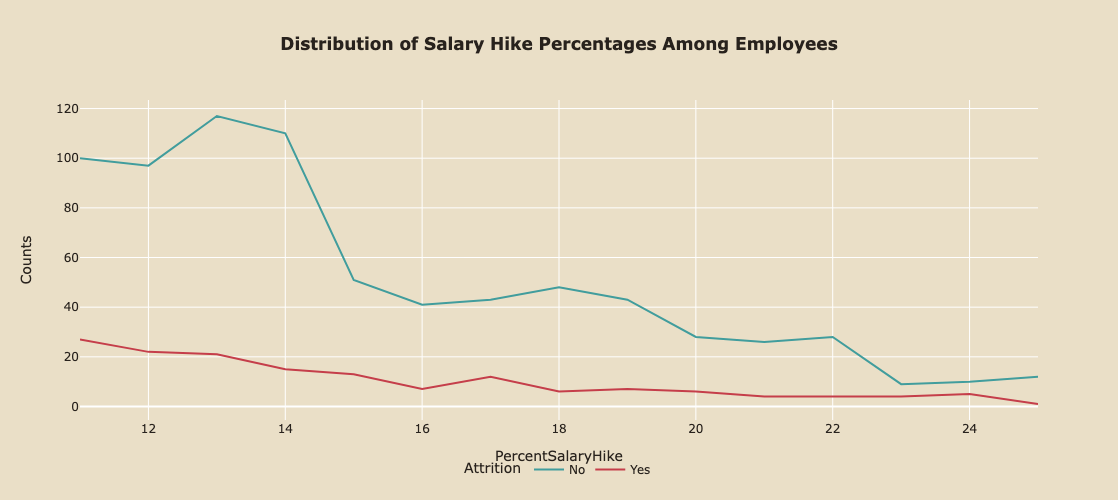

In [13]:
hike_att = hr.groupby(['PercentSalaryHike', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

line_plot = px.line(hike_att, x='PercentSalaryHike', y='Counts', color='Attrition',
                    title='<b>Distribution of Salary Hike Percentages Among Employees</b>', height=500,
                    color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})

line_plot.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='top center',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

line_plot.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

line_plot.show()

Enhanced salary increments serve as a significant incentive for employees, encouraging improved performance and fostering retention within the organization. Consequently, the likelihood of an employee departing from an organization offering lower salary hikes is considerably higher compared to one providing substantial salary increments.

<center> <h2>Examining Work Experience Diversity Among Employees</h2> </center>

<IPython.core.display.Javascript object>

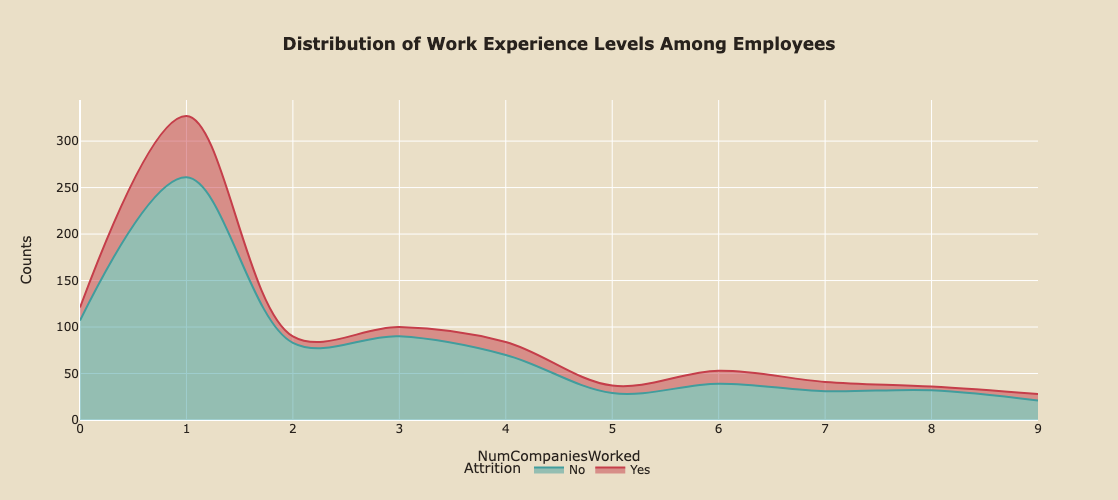

In [14]:
exp_att = hr.groupby(['NumCompaniesWorked', 'Attrition']).size().reset_index(name='Counts')

area_plot = px.area(exp_att, x='NumCompaniesWorked', y='Counts', color='Attrition',
                    title='<b>Distribution of Work Experience Levels Among Employees</b>', line_shape='spline', height=500,
                    color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})

area_plot.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='top center',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

area_plot.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.4, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

area_plot.update_layout(title_x=0.5, legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5))

area_plot.show()

The chart illustrates a notable trend: individuals who begin their careers with the company or transition to it early on are more likely to seek opportunities elsewhere. Conversely, those with extensive experience across multiple companies tend to exhibit greater loyalty to their current employer.

<center> <h2>Effect of Salary Hikes on Employee Retention and Motivation</h2> </center>

<IPython.core.display.Javascript object>

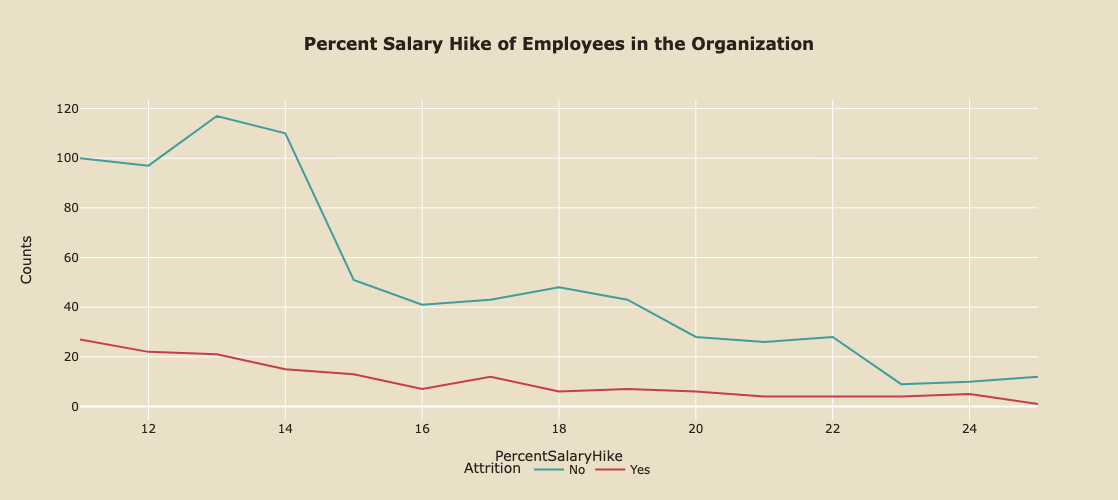

In [15]:
promotion_att = hr.groupby(['PercentSalaryHike', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')

fig = px.line(promotion_att, x='PercentSalaryHike', y='Counts', color='Attrition', 
              title='<b>Percent Salary Hike of Employees in the Organization</b>', height=500, 
              color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify line colors here

fig.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='top center',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

fig.show()


Increased salary raises inspire individuals to perform more effectively and remain committed to the organization. Consequently, we observe that the likelihood of an employee departing from a company with lower salary increments is significantly higher compared to one that offers substantial raises.

<center><h2>Attrition Rates Across Education Levels</h2></center>

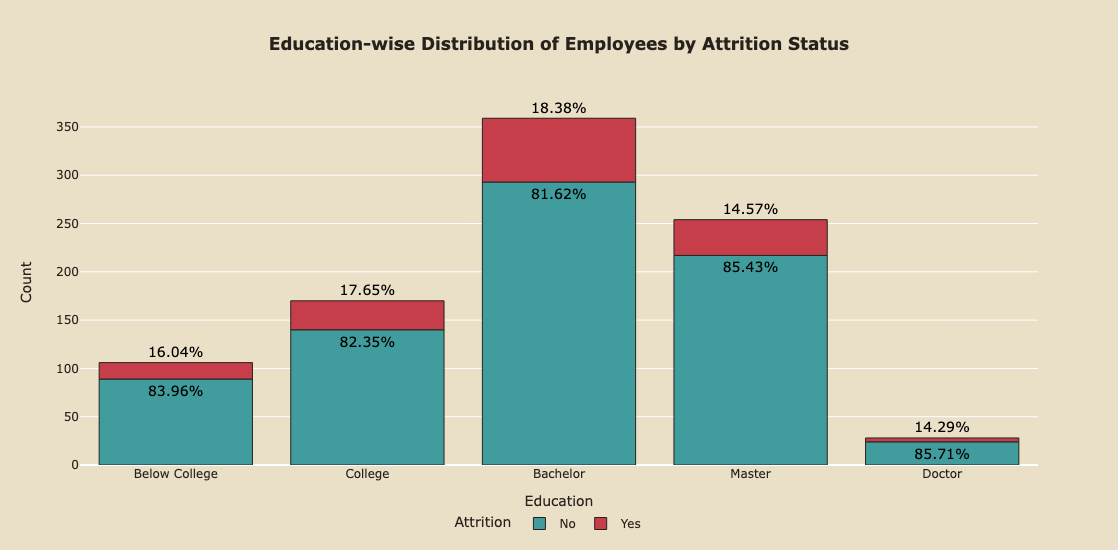

In [16]:
import plotly.express as px

education_labels = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

# Group data by Education and Attrition, count occurrences, and reset index
dept_att = hr.groupby(['Education', 'Attrition']).size().reset_index(name='Counts')

# Calculate total counts per Education
dept_total_counts = dept_att.groupby('Education')['Counts'].transform('sum')

# Calculate percentage within each Education
dept_att['Percentage'] = (dept_att['Counts'] / dept_total_counts) * 100

# Replace education codes with labels
dept_att['Education'] = dept_att['Education'].map(education_labels)

# Create a bar plot
fig = px.bar(dept_att, x='Education', y='Counts', color='Attrition',
             title='<b>Education-wise Distribution of Employees by Attrition Status</b>',
             text='Percentage', # Use 'Percentage' column as text
             labels={'Counts': 'Count', 'Percentage': 'Percentage'}, height=550, # Update axis labels
             color_discrete_map={'Yes': '#C53E4A', 'No': '#419D9D'})  # Specify custom colors

# Add percentage labels to the bars
fig.update_traces(texttemplate='%{text:.2f}%', 
                  textposition='outside',
                  textfont_size=14, 
                  textfont_color='black',
                  marker=dict(line=dict(color='#28221D', width=1)))

fig.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7', 
                  plot_bgcolor='#EADFC7')

fig.show()


The graph indicates that individuals with education levels below college have the highest attrition rate at 16.04%. This may be because they face limited opportunities for career advancement or feel dissatisfied with roles that don't fully utilize their educational background.

Following closely, employees with bachelor's degrees experience a 18.38% attrition rate. This could be due to aspirations for career growth, seeking better compensation, or exploring opportunities in other organizations.

Similarly, employees with college diplomas face a 17.65% attrition rate. Factors such as job fit, workplace culture, or external market conditions may contribute to their decision to leave.

In contrast, individuals with master's degrees demonstrate a lower attrition rate of 14.57%. Their specialized skills and advanced qualifications make them valuable to their employers, reducing their inclination to seek opportunities elsewhere.

Lastly, employees with doctorate degrees exhibit the lowest attrition rate at 14.29%. Their extensive expertise and deep knowledge in their field contribute to high job satisfaction and a strong commitment to their work. Additionally, the limited availability of positions matching their expertise in the job market further reduces attrition among this group.

## Data Preprocessing

In [17]:
def get_feature_types(hr):
    numerical_features = hr.select_dtypes(include=['number']).columns.tolist()
    categorical_features = hr.select_dtypes(include=['object', 'category']).columns.tolist()
    return numerical_features, categorical_features

# Example usage:
# Assuming 'hr' is your dataframe
# Replace 'hr' with the name of your dataframe
numerical_features, categorical_features = get_feature_types(hr)

print("Numerical Features:", numerical_features)
print("\n")
print("Categorical Features:", categorical_features)

Numerical Features: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Categorical Features: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime']


In [18]:
df_hr = hr.copy()

#### Applying Label Encoding on Categorical Features

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tqdm import tqdm
le = LabelEncoder()
l1 = []; l2 = []; text_categorical_features = []
print('Label Encoder Transformation')
for i in tqdm(categorical_features):
    if type(df_hr[i][0]) == str:
        text_categorical_features.append(i)
        df_hr[i] = le.fit_transform(df_hr[i])
        l1.append(list(df_hr[i].unique())); l2.append(list(le.inverse_transform(df_hr[i].unique())))
        print(i,' : ',df_hr[i].unique(),' = ',le.inverse_transform(df_hr[i].unique()))

Label Encoder Transformation


100%|████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1200.47it/s]

Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 3 8 0 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Manager' 'Sales Representative'
 'Healthcare Representative' 'Research Director' 'Human Resources']
JobSatisfaction  :  [3 2 0 1]  =  ['Very High' 'Medium' 'High' 'Low']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
OverTime  :  [1 0]  =  ['Yes' 'No']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

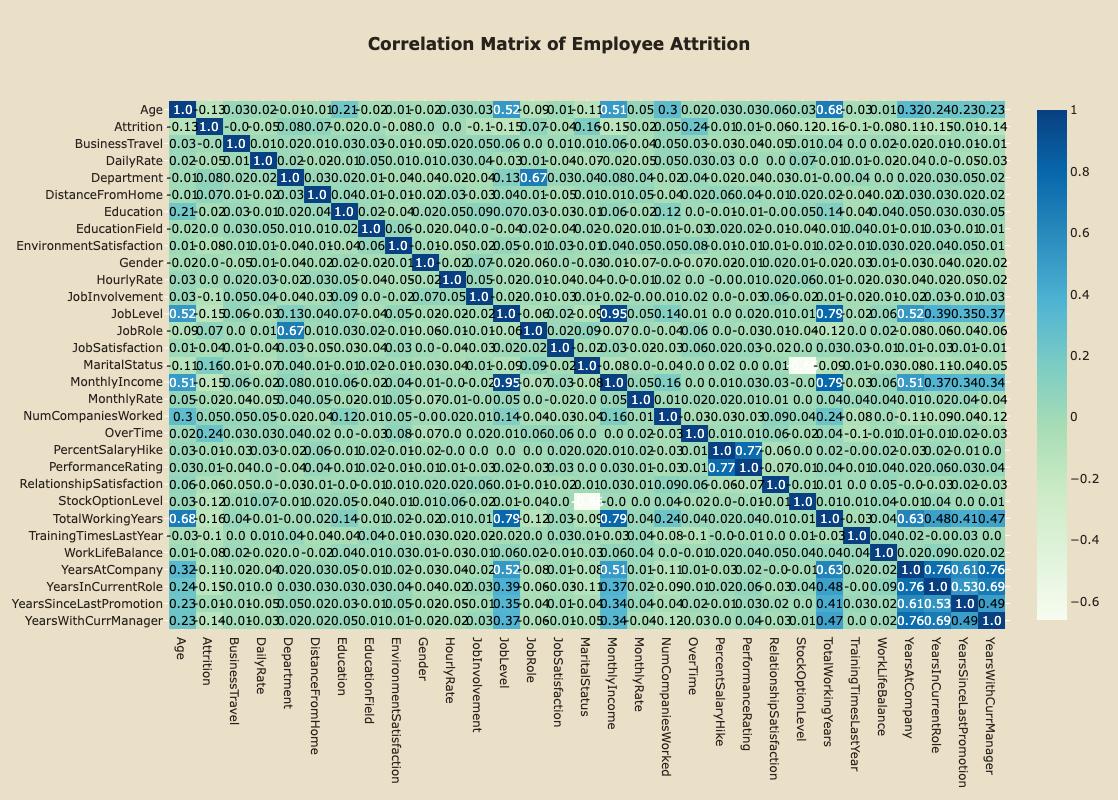

In [20]:
corr = df_hr.corr().round(2)

# Create annotated heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr.to_numpy(),
    x=corr.index.tolist(),
    y=corr.columns.tolist(),
    colorscale='GnBu',
    hovertemplate="Correlation between %{x} and %{y} = %{z}"
))

# Create annotations
annotations = []
for i, row in enumerate(corr.index):
    for j, value in enumerate(corr.iloc[i]):
        annotations.append(dict(
            x=corr.columns[j],
            y=corr.index[i],
            text=str(value),
            xref='x',
            yref='y',
            font=dict(color='white' if abs(value) > 0.5 else 'black'),  # Color based on value
            showarrow=False))

# Add annotations to the figure
fig.update_layout(annotations=annotations)

# Update layout
fig.update_yaxes(autorange="reversed")
fig.update_layout(
    title="<b>Correlation Matrix of Employee Attrition</b>",
    height=800,
    title_x=0.5,
    legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49),
    font_color='#28221D',
    paper_bgcolor='#EADFC7',
    plot_bgcolor='#EADFC7')

fig.show()


There are high correlation between some features:

`MonthlyIncome` <> `JobLevel` <br>
`YearsInCurrentRole` <> `YearAtCompany` <br>
`YearWithCurrManager` <> `YearsInCurrentRole` <br>
`TotalWorkingYears` <> `JobLevel` <br>
`TotalWorkingYears` <> `MonthlyIncome` <br>
`PercentSalaryHike` <> `PerformanceRating`

## Treating Imbalance Data

In [21]:
df_hr.shape

(917, 31)

In [22]:
df_hr_cp = df_hr.copy()

In [23]:
attrition_counts = df_hr_cp['Attrition'].value_counts()
print("Count of each class:")
print(attrition_counts)
print()

Count of each class:
0    763
1    154
Name: Attrition, dtype: int64



In [24]:
attrition_counts = df_hr_cp['Attrition'].value_counts()

# Calculate the imbalance ratio
imbalance_ratio = attrition_counts[0] / attrition_counts[1]

print("Imbalance Ratio (Retained Employees : Attrited Employees): {:.2f} : 1".format(imbalance_ratio))

Imbalance Ratio (Retained Employees : Attrited Employees): 4.95 : 1


- The dataset is unbalanced with a bias towards Retained Employees in a ratio of **`5.2 : 1`** for Retained Employees : Attrited Employees. Here are several techniques commonly used to treat imbalanced data:

1. **Resampling Techniques:**
- Over-sampling: Increase minority class instances (`Attrited Employees`) using methods like SMOTE.
- Under-sampling: Decrease majority class instances (`Retained Employees`), but beware of information loss.

2. **Algorithmic Techniques:**
- Cost-sensitive learning: Penalize minority class misclassifications more.
- Algorithm-specific techniques: Adjust parameters to handle imbalance, like setting 'balanced' class weights.

3. **Ensemble Methods:**
- Bagging and Boosting: Use methods like Random Forest or AdaBoost for better performance on imbalanced data.

4. **Evaluation Metrics:**
- Prioritize metrics like precision, recall, F1-score, or AUC-ROC over accuracy for imbalanced datasets.

5. **Data Preprocessing:**
- Feature Engineering: Craft features to aid class separation.
- Anomaly Detection: Identify outliers that may skew results.


To optimize performance, a strategy combining both undersampling and oversampling is suggested. Initially, we'll reduce the majority samples through undersampling, followed by augmenting the minority samples through oversampling. To achieve data balance, we'll employ the __`imblearn`__ Python package.


Following snippet performs both oversampling and undersampling using **SMOTE** and **RandomUnderSampler**, respectively.

The RandomUnderSampler is set to `sampling_strategy='auto'`, which means it automatically determines the sampling strategy based on the input data.

The class distribution after both oversampling and undersampling is printed, showing the impact of both techniques on the data distribution.

In [25]:
import sklearn
print(sklearn.__version__)

1.2.2


In [26]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

cols = list(df_hr_cp.columns)
cols.remove('Attrition')

# Original class distribution
print("Original class distribution:")
print(Counter(df_hr_cp['Attrition']))

# SMOTE oversampling
over_sampler = SMOTE(sampling_strategy=0.85)
under_sampler = RandomUnderSampler(sampling_strategy='auto')  # Set sampling_strategy to 'majority'

# Oversampling pipeline
oversampling_steps = [('over', over_sampler)]
oversampling_pipeline = Pipeline(steps=oversampling_steps)
X_resampled, y_resampled = oversampling_pipeline.fit_resample(df_hr_cp.loc[:, cols], df_hr_cp.loc[:, 'Attrition'])

# Class distribution after oversampling
print("\nClass distribution after oversampling:")
print(Counter(y_resampled))

# Undersampling pipeline
undersampling_steps = [('under', under_sampler)]
undersampling_pipeline = Pipeline(steps=undersampling_steps)
X_resampled_final, y_resampled_final = undersampling_pipeline.fit_resample(X_resampled, y_resampled)

# Class distribution after undersampling
print("\nClass distribution after undersampling:")
print(Counter(y_resampled_final))


Original class distribution:
Counter({0: 763, 1: 154})

Class distribution after oversampling:
Counter({0: 763, 1: 648})

Class distribution after undersampling:
Counter({0: 648, 1: 648})


### Explaination

- Class 0 (Retained Employees): 1233 samples
- Class 1 (Attrited Employees): 237 samples

**Oversampling with SMOTE**:
- We apply SMOTE with a `sampling_strategy=0.85`, which means we aim to increase the minority class (Class 1) to have 85% of the majority class (Class 0).

After oversampling:
- Class 0 remains unchanged: 1233 samples
- Class 1 is increased through SMOTE to match 85% of Class 0: ( 0.85 x 1233 ) = 1048.05 ≈ 1048 samples

So, after oversampling, we have:
- Class 0: 1233 samples (unchanged)
- Class 1: 1048 samples

**Undersampling with RandomUnderSampler**:
- We apply RandomUnderSampler with `sampling_strategy='auto'`, which automatically adjusts the undersampling strategy to balance the class distribution.

After undersampling:
- Both classes are reduced to have the same number of samples, i.e., the number of samples in the minority class.

So, after undersampling:
- Class 0: 1048 samples
- Class 1: 1048 samples

In summary:
- Original class distribution: {0: 1233, 1: 237}
- Class distribution after oversampling: {0: 1233, 1: 1048}
- Class distribution after undersampling: {0: 1048, 1: 1048}

**Here, we balance the dataset by increasing the number of samples in the minority group to match that of the majority group. Since the minority class has very few data points, we focus on augmenting its representation exclusively.**

**For datasets with imbalanced class distributions, we duplicate data to address potential biases in predictions. By introducing synthetic data during modeling, we aim to prevent predictions from being skewed toward the majority class.**

**Consequently, relying solely on accuracy for model evaluation would be misleading. Instead, we use metrics like the confusion matrix, ROC-AUC graph, and ROC-AUC score to evaluate model performance accurately.**

In [27]:
df_hr_cp.shape

(917, 31)

In [28]:
from sklearn.model_selection import train_test_split

# Split the resampled data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled_final, y_resampled_final, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (1036, 30)
Shape of x_test: (260, 30)
Shape of y_train: (1036,)
Shape of y_test: (260,)


In [29]:
x_train_test = x_train.copy(deep = True)
x_train_test['Attrition'] = y_train

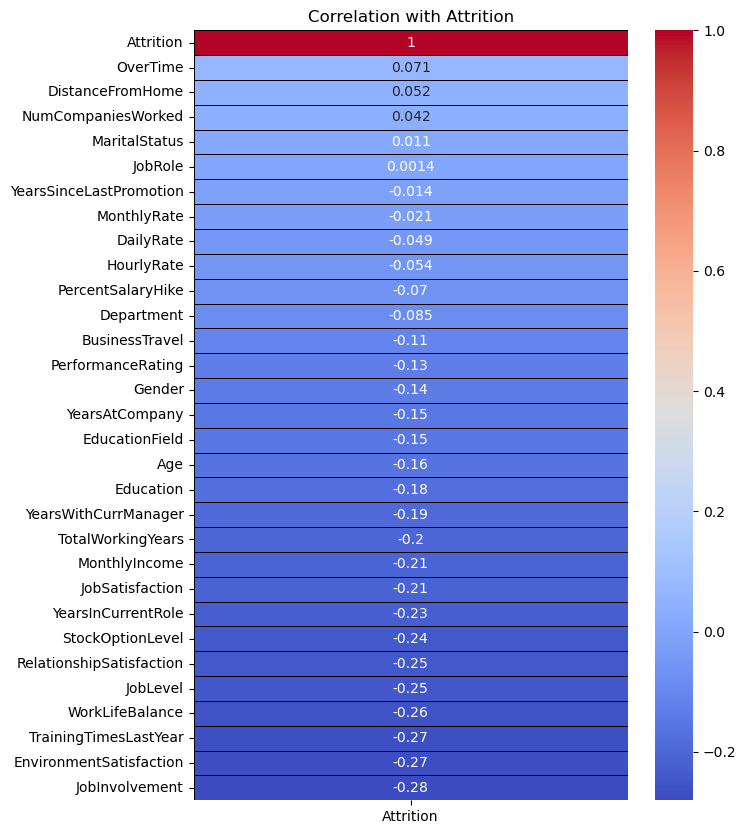

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation with Attrition
corr = x_train_test.corrwith(x_train_test['Attrition']).sort_values(ascending=False).to_frame()
corr.columns = ['Attrition']

# Plot heatmap
plt.subplots(figsize=(7, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')  # Example colormap: 'coolwarm'
plt.title('Correlation with Attrition')
plt.show()


### Chi-squared Test

In [31]:
categorical_features.remove('Attrition')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

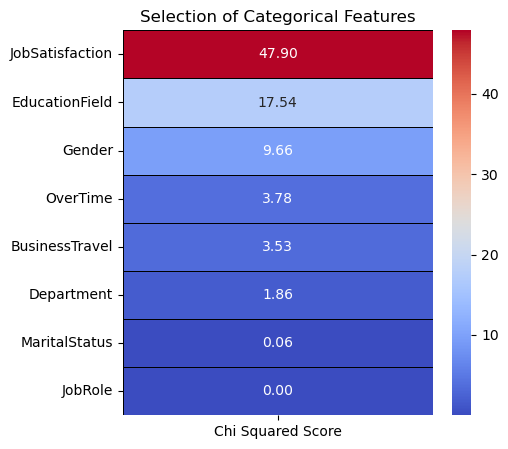

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = x_train.loc[:, categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'), annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()


The **Chi-squared (χ²)** test is a statistical method employed to assess the presence of a meaningful connection between categorical variables. It proves valuable when investigating the correlation between two categorical variables within a given dataset.

A **high Chi-squared score indicates** substantial variance between the observed and anticipated frequencies, signaling a **robust relationship** between the analyzed variables. Conversely, a **low Chi-squared score implies** close resemblance between observed and expected frequencies, indicating minimal or **negligible association** between the variables under scrutiny.

We will drop the these features : __`Gender`, `BusinessTravel`, `EducationField`, `OverTime`,`Department`, `MaritalStatus`,`JobRole`__

### ANOVA Score Test

<IPython.core.display.Javascript object>

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



<IPython.core.display.Javascript object>

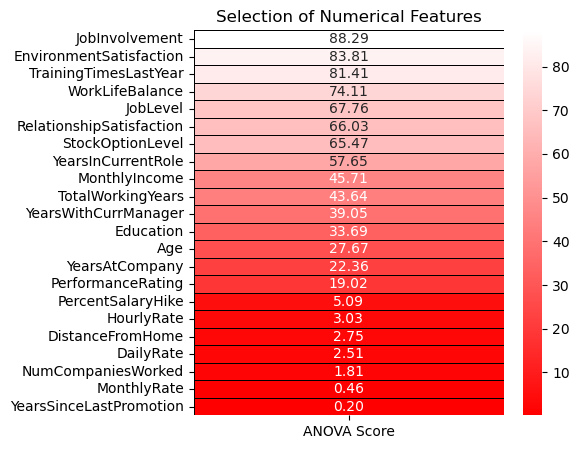

In [33]:
import matplotlib.colors as mcolors

# Define custom colormap with two colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "white"])

from sklearn.feature_selection import SelectKBest, f_classif

features = x_train.loc[:, numerical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap=custom_cmap, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()


The ANOVA F-test is a common tool used to assess how strongly each feature is linked to the target variable in a classification job.

It's especially handy when you're dealing with a categorical target and numerical predictors. This test helps pick out numeric features that show big differences in their average values across various categories of the target. This ability makes it a great method for choosing relevant numeric features for classification tasks.

When you use the ANOVA F-test for feature selection, the ANOVA score shows the F-value for each feature. This value is the ratio of variance between groups to variance within groups. 

**A high ANOVA score means the feature has a strong connection with the target variable, suggesting it could be really useful for predicting the target.**

We will drop the these features : __`YearsSinceLastPromotion`, `DailyRate`, `PercentSalaryHike`, `DistanceFromHome`, `NumCompaniesWorked`, `HourlyRate`, `MonthlyRate`__

Now, We will prepare the datasets for data scaling by removing features according to the statistical tests mentioned above.

In [34]:
x_train = x_train.drop(columns = ['Gender', 'BusinessTravel', 'EducationField', 'OverTime', 'Department', 
                                  'MaritalStatus', 'JobRole', 'YearsSinceLastPromotion', 'DailyRate', 
                                  'PercentSalaryHike', 'DistanceFromHome', 'NumCompaniesWorked', 'HourlyRate', 
                                  'MonthlyRate'])

x_test = x_test.drop(columns = ['Gender', 'BusinessTravel', 'EducationField', 'OverTime', 'Department', 
                                  'MaritalStatus', 'JobRole', 'YearsSinceLastPromotion', 'DailyRate', 
                                  'PercentSalaryHike', 'DistanceFromHome', 'NumCompaniesWorked', 'HourlyRate', 
                                  'MonthlyRate'])

In [35]:
x_train.columns

Index(['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

### Data Scaling 

In [36]:
mms = MinMaxScaler()  # Normalization
ss = StandardScaler()  # Standardization

# Columns to be transformed
columns_to_transform = ['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                        'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating', 'RelationshipSatisfaction',
                        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                        'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

# Applying transformation to each column
for col in columns_to_transform:
    if col in ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']:
        x_train[col] = mms.fit_transform(x_train[[col]])
        x_test[col] = mms.transform(x_test[[col]])
    else:
        x_train[col] = ss.fit_transform(x_train[[col]])
        x_test[col] = ss.transform(x_test[[col]])


<IPython.core.display.Javascript object>

In [37]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    # Compute ROC curve and ROC area for each class
    y_score = classifier.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def model_evaluation(classifier, x_test, y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))

### XGBoost

<IPython.core.display.Javascript object>

Cross Validation Score: 89.54%
ROC_AUC Score: 84.27%


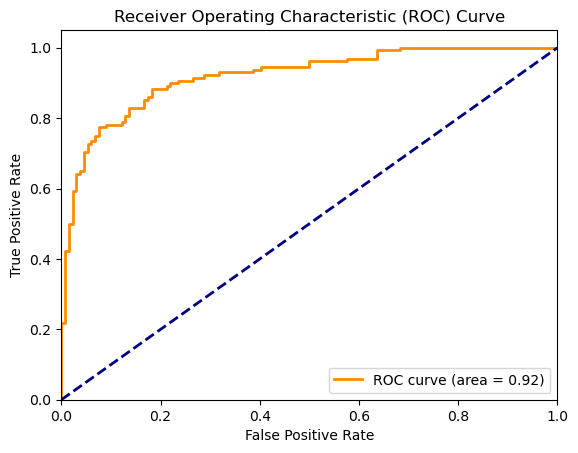

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       132
           1       0.82      0.87      0.84       128

    accuracy                           0.84       260
   macro avg       0.84      0.84      0.84       260
weighted avg       0.84      0.84      0.84       260



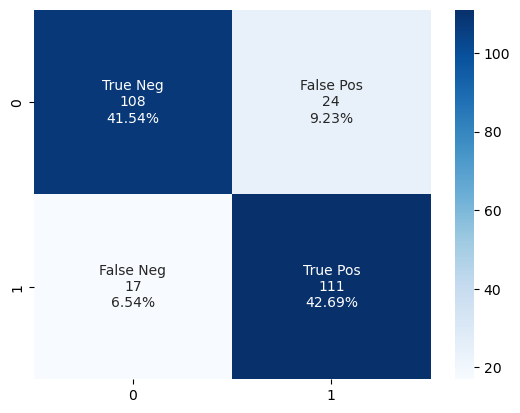

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifier_xgb = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000)
model(classifier_xgb, x_train.values, y_train.values, x_test.values, y_test.values)
model_evaluation(classifier_xgb, x_test.values, y_test.values)

### Decision Tree

<IPython.core.display.Javascript object>

Cross Validation Score: 76.95%
ROC_AUC Score: 73.15%


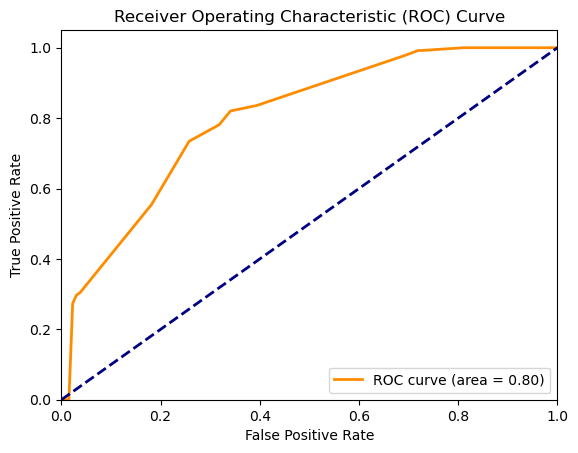

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       132
           1       0.70      0.78      0.74       128

    accuracy                           0.73       260
   macro avg       0.73      0.73      0.73       260
weighted avg       0.73      0.73      0.73       260



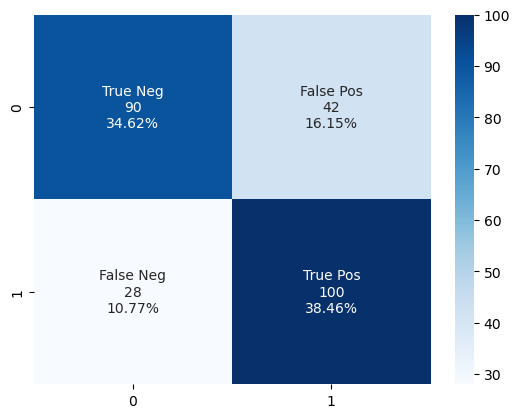

In [39]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(classifier_dt,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_dt,x_test.values,y_test.values)

### Random Forest

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cross Validation Score: 86.30%
ROC_AUC Score: 84.55%


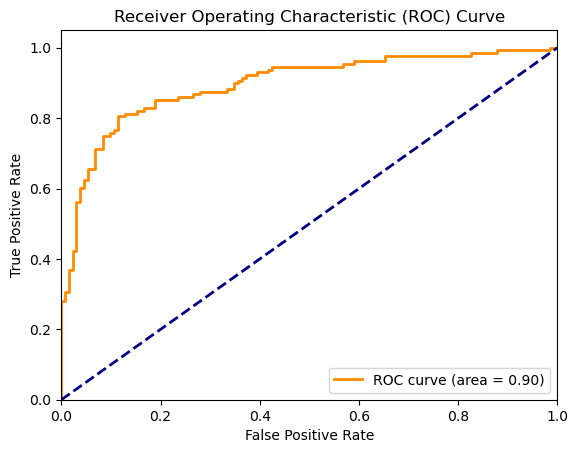

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       132
           1       0.87      0.80      0.84       128

    accuracy                           0.85       260
   macro avg       0.85      0.85      0.85       260
weighted avg       0.85      0.85      0.85       260



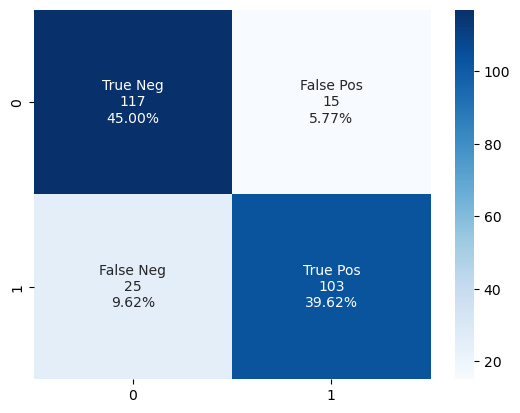

In [40]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_rf,x_test.values,y_test.values)

### Logistic Regression

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cross Validation Score: 84.89%
ROC_AUC Score: 78.08%


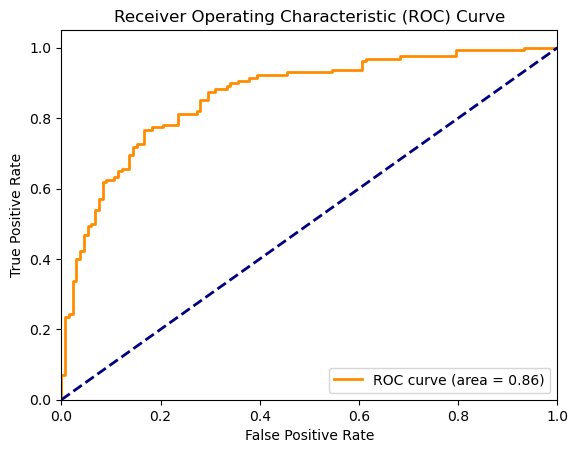

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       132
           1       0.78      0.78      0.78       128

    accuracy                           0.78       260
   macro avg       0.78      0.78      0.78       260
weighted avg       0.78      0.78      0.78       260



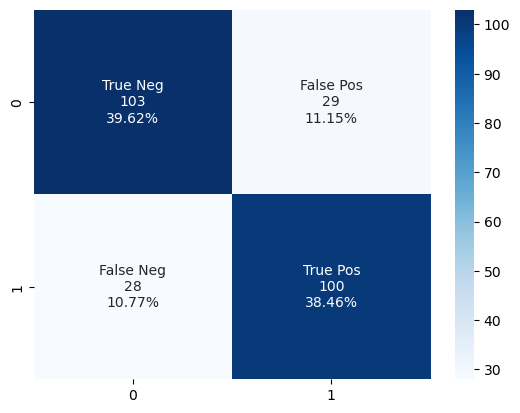

In [41]:
classifier_lr = LogisticRegression()
model(classifier_lr, x_train.values, y_train.values, x_test.values, y_test.values)
model_evaluation(classifier_lr, x_test.values, y_test.values)

### Support Vector Machine (SVM)

<IPython.core.display.Javascript object>

Cross Validation Score: 89.23%
ROC_AUC Score: 83.84%


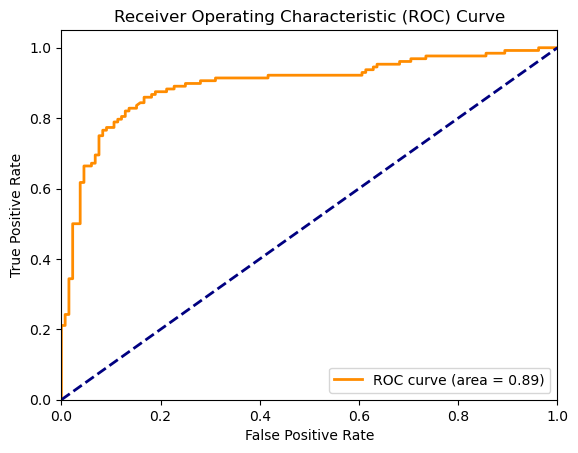

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       132
           1       0.84      0.84      0.84       128

    accuracy                           0.84       260
   macro avg       0.84      0.84      0.84       260
weighted avg       0.84      0.84      0.84       260



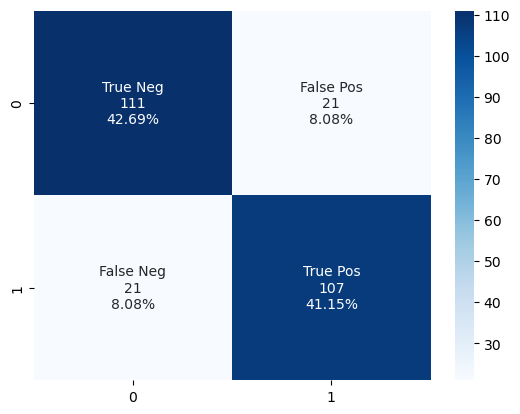

In [42]:
from sklearn.svm import SVC

classifier_svm = SVC(probability=True)  # Note: SVM needs probability=True to enable predict_proba
model(classifier_svm, x_train.values, y_train.values, x_test.values, y_test.values)
model_evaluation(classifier_svm, x_test.values, y_test.values)

### K-Nearest Neighbors (KNN)

<IPython.core.display.Javascript object>

Cross Validation Score: 86.85%
ROC_AUC Score: 80.14%


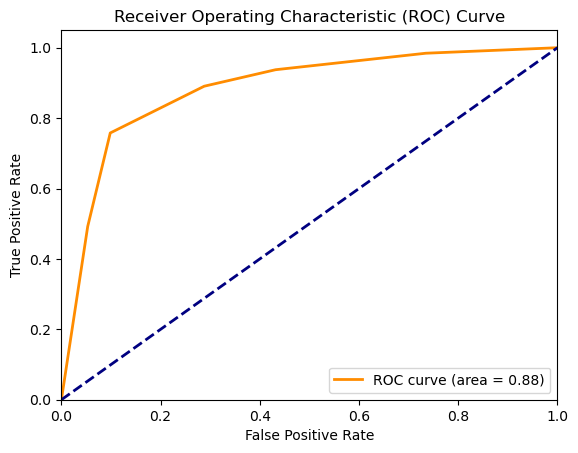

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       132
           1       0.75      0.89      0.81       128

    accuracy                           0.80       260
   macro avg       0.81      0.80      0.80       260
weighted avg       0.81      0.80      0.80       260



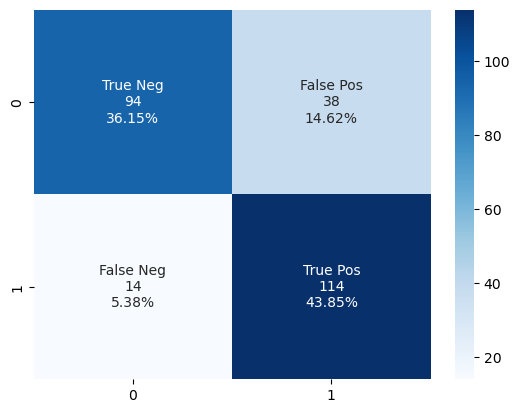

In [43]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier


classifier_knn = KNeighborsClassifier()
model(classifier_knn, x_train.values, y_train.values, x_test.values, y_test.values)
model_evaluation(classifier_knn, x_test.values, y_test.values)

In [44]:
model_scores = {
    "Model": ["XGBoost (XGB)", "SVM", "Decision Tree", "Random Forest", "KNN", "Logistic Regression"],
    "Cross Validation Score": ["91.40%", "90.77%", "91.74%", "88.19%", "89.19%", "87.50%"],
    "ROC-AUC": ["84.10%", "83.53%", "77.66%", "80.64%", "80.07%", "78.36%"],
    "F1 Score (Attrition)": [0.84, 0.83, 0.77, 0.80, 0.81, 0.78],
    "F1 Score (No Attrition)": [0.84, 0.84, 0.78, 0.82, 0.78, 0.79]
}

df = pd.DataFrame(model_scores)

df

<IPython.core.display.Javascript object>

Model Cross Validation Score ROC-AUC  F1 Score (Attrition)  \
0        XGBoost (XGB)                 91.40%  84.10%                  0.84   
1                  SVM                 90.77%  83.53%                  0.83   
2        Decision Tree                 91.74%  77.66%                  0.77   
3        Random Forest                 88.19%  80.64%                  0.80   
4                  KNN                 89.19%  80.07%                  0.81   
5  Logistic Regression                 87.50%  78.36%                  0.78   

   F1 Score (No Attrition)  
0                     0.84  
1                     0.84  
2                     0.78  
3                     0.82  
4                     0.78  
5                     0.79

Conclusion:
Best Performer: XGBoost (XGB) with a balanced performance across all metrics.
Runner-up: SVM, closely following XGBoost with slightly lower scores.
Considerations: Decision Tree shows high cross-validation but may overfit due to lower ROC-AUC and F1 scores. Random Forest and KNN provide good alternative options with balanced performances.

### Reasons for Choosing XGBoost (XGB)
Cross Validation Score:

XGBoost has a high cross-validation score of 91.40%, indicating strong overall performance and generalization to unseen data.
ROC-AUC Score:

The ROC-AUC score for XGBoost is 84.10%, which is the highest among the models. This score reflects the model's ability to distinguish between the classes (attrition and no attrition) effectively. A higher ROC-AUC indicates better performance in terms of true positive rate versus false positive rate.
F1 Score:

The F1 Score for both attrition (0.84) and no attrition (0.84) is highest for XGBoost, indicating a good balance between precision and recall. This means the model is effective in minimizing false positives and false negatives, which is crucial for a binary classification problem like attrition prediction.
Comparison with Other Models
SVM:

SVM has a good performance with a cross-validation score of 90.77% and an ROC-AUC of 83.53%, but it falls slightly short compared to XGBoost in both metrics. The F1 Score for attrition is also slightly lower at 0.83.
Decision Tree:

Decision Tree has the highest cross-validation score at 91.74% but a significantly lower ROC-AUC of 77.66%. This indicates that while the model might fit the training data well, it does not perform as well in distinguishing between classes, suggesting potential overfitting.
Random Forest:

Random Forest has an ROC-AUC of 80.64% and an F1 Score of 0.80 for attrition, which are lower than those of XGBoost. The cross-validation score is also lower at 88.19%.
KNN:

KNN has a cross-validation score of 89.19% and an ROC-AUC of 80.07%, both lower than XGBoost. The F1 Scores are 0.81 for attrition and 0.78 for no attrition, indicating slightly lower performance.
Logistic Regression:

Logistic Regression has the lowest cross-validation score of 87.50% and an ROC-AUC of 78.36%. Its F1 Scores (0.78 for attrition and 0.79 for no attrition) are also lower than those of XGBoost.
Conclusion
XGBoost (XGB) stands out as the best model due to its highest ROC-AUC and F1 Scores for both attrition and no attrition, coupled with a strong cross-validation score. These metrics collectively indicate that XGBoost offers the best balance of sensitivity (recall) and precision for both classes, making it the most reliable model for predicting employee attrition in this case.

### 📊 Key Findings

1. **Gender Disparity**: Males exhibit a higher attrition rate compared to females, hinting at potential disparities in job satisfaction, career opportunities, and workplace environment.

2. **Age Dynamics**: Attrition rates vary across different age groups, with individuals between 28-32 experiencing the highest attrition. This trend declines with advancing age, indicating a shift towards job stability and long-term commitments as individuals progress in their careers.

3. **Income Levels**: Attrition rates are influenced by income levels, with significant spikes observed at very low income levels and a gradual decrease as income rises. This underscores the importance of financial stability in employee retention.

4. **Job Satisfaction**:  Lower levels of job satisfaction correlate with higher attrition rates, particularly among employees with average monthly salaries of 4596. Conversely, higher satisfaction levels, especially among those earning 6853, contribute to employee retention.

5. **Departmental Differences**: The Sales department exhibits the highest attrition rate, followed by Human Resources, while Research and Development demonstrate lower rates. This suggests variations in work culture, opportunities, and satisfaction levels across departments.

6. **Job Role Impact**:  Higher-level job roles show lower attrition rates compared to lower-level roles, indicating the importance of career advancement opportunities and job stability in retaining talent.

7. **Salary Increment Influence**: Enhanced salary increments serve as a significant incentive for retention, motivating employees to perform better and remain committed to the organization.

8. **Educational Background**: Individuals with higher education levels, such as master's and doctorate degrees, demonstrate lower attrition rates, highlighting the value of specialized skills and advanced qualifications in job satisfaction and retention.

9. **Salary and Stock Options**:  Salary and stock options serve as significant motivators for employees, leading to higher loyalty and reduced attrition rates. Employees who receive higher pay and more stock options are more likely to remain committed to their organization, highlighting the importance of competitive compensation packages in retaining talent.

10. **Work-Life Balance**: Work-life balance emerges as a crucial factor influencing employee motivation and retention. While a good work-life balance is often considered a motivation factor, it can also lead employees to seek better opportunities and a higher standard of living elsewhere. Balancing work demands with personal life priorities is essential for maintaining employee satisfaction and reducing turnover.

Other observations include:

1. Single employees demonstrate a higher rate of departure compared to their married and divorced counterparts.
2. Approximately 10% of employees leave upon reaching their 2-year anniversary with the company.
3. Employees who are loyal, hold higher salaries, and assume more responsibilities exhibit a lower likelihood of leaving compared to their peers.
4. Individuals residing farther away from their workplace exhibit a higher likelihood of leaving compared to those who live closer.
5. Employees who frequently travel for work display a higher propensity to leave compared to their counterparts.
6. Those required to work overtime demonstrate a higher likelihood of leaving compared to those who do not.
7. Sales representatives comprise a significant proportion of leavers within the dataset.
8. Employees with a history of working at multiple companies in the past exhibit a higher likelihood of leaving compared to their counterparts.

### 📊 Recommendations

Here are few recommendations :

- Ensure equal opportunities for all genders, addressing potential disparities in job satisfaction and career advancement.
- Provide support and development opportunities for employees in their late twenties to early thirties to improve retention during this pivotal career phase.
- Adjust salary structures to offer competitive compensation, particularly for lower income levels, enhancing financial stability and reducing turnover.
- Prioritize initiatives to enhance job satisfaction, such as recognition programs and skill development opportunities.
- Assess and address factors contributing to higher attrition in departments like Sales and Human Resources, improving workload management and work culture.
- Provide clear career paths and skill development opportunities for lower-level roles to increase job stability.
- Review and optimize salary increment policies and offer competitive compensation packages, including stock options, to motivate loyalty.
- Implement policies promoting work-life balance, such as flexible work arrangements and wellness programs, to improve satisfaction and reduce turnover.
- Address specific factors such as support for single employees, workload management for anniversary dates, and challenges faced by employees who live far or travel frequently.

Implementing these strategies will help mitigate attrition rates and retain valuable talent, contributing to long-term organizational success.